In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog'):
    for filename in filenames[:10]:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/be9d33541d.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/4c3aa8ea6e.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/18e7abc37e.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/6a20935af5.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/e642d9ea5f.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/3f3b08f78d.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/68e7e02a47.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/f17eacf7d8.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/3f970065e5.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/7030643376.csv


In [2]:
# Load and Inspect Data
defog_path = "/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog"

file_one = os.path.join(defog_path, "18e7abc37e.csv")
file_two = os.path.join(defog_path, "f17eacf7d8.csv")
file_three = os.path.join(defog_path, "68e7e02a47.csv")

print("Dataset 1:")
df_1 = pd.read_csv(file_one)
print("Shape:", df_1.shape)
print("Head:", df_1.head())
print("Columns:", df_1.columns)


print("\nDataset 2:")
df_2 = pd.read_csv(file_two)
print("Shape:", df_2.shape)
print("Head:", df_2.head())
print("Columns:", df_2.columns)


print("\nDataset 3:")
df_3 = pd.read_csv(file_three)
print("Shape:", df_3.shape)
print("Head:", df_3.head())
print("Columns:", df_3.columns)

Dataset 1:
Shape: (75076, 9)
Head:    Time      AccV     AccML     AccAP  StartHesitation  Turn  Walking  Valid  \
0     0 -0.818398 -0.015625 -0.546875                0     0        0  False   
1     1 -0.821810 -0.015625 -0.537565                0     0        0  False   
2     2 -0.819192 -0.015625 -0.531250                0     0        0  False   
3     3 -0.818965 -0.015625 -0.539780                0     0        0  False   
4     4 -0.838140 -0.015625 -0.538761                0     0        0  False   

    Task  
0  False  
1  False  
2  False  
3  False  
4  False  
Columns: Index(['Time', 'AccV', 'AccML', 'AccAP', 'StartHesitation', 'Turn', 'Walking',
       'Valid', 'Task'],
      dtype='object')

Dataset 2:
Shape: (112666, 9)
Head:    Time      AccV     AccML     AccAP  StartHesitation  Turn  Walking  Valid  \
0     0 -1.013891  0.163125 -0.186132                0     0        0  False   
1     1 -1.018139  0.164666 -0.184647                0     0        0  False   
2     

In [3]:
# 1. Check FOG Label Distribution
print("Dataset 1:")
print("Start Hesitation:", df_1['StartHesitation'].sum())
print("Turn:", df_1['Turn'].sum())
print("Walking:", df_1['Walking'].sum())
print("Any FOG:", (df_1[['StartHesitation','Turn','Walking']].sum(axis=1) > 0).sum())

print("\nDataset 2:")
print("Start Hesitation:", df_2['StartHesitation'].sum())
print("Turn:", df_2['Turn'].sum())
print("Walking:", df_2['Walking'].sum())
print("Any FOG:", (df_2[['StartHesitation','Turn','Walking']].sum(axis=1) > 0).sum())

print("\nDataset 3:")
print("Start Hesitation:", df_3['StartHesitation'].sum())
print("Turn:", df_3['Turn'].sum())
print("Walking:", df_3['Walking'].sum())
print("Any FOG:", (df_3[['StartHesitation','Turn','Walking']].sum(axis=1) > 0).sum())

Dataset 1:
Start Hesitation: 0
Turn: 484
Walking: 0
Any FOG: 484

Dataset 2:
Start Hesitation: 0
Turn: 943
Walking: 0
Any FOG: 943

Dataset 3:
Start Hesitation: 65
Turn: 12917
Walking: 2060
Any FOG: 15042


In [4]:
# 2. Filter to Valid + Task Segments
#df_valid = df[(df['Valid'] == True) & (df['Task'] == True)]
#print("Valid/Task data shape:", df_valid.shape)

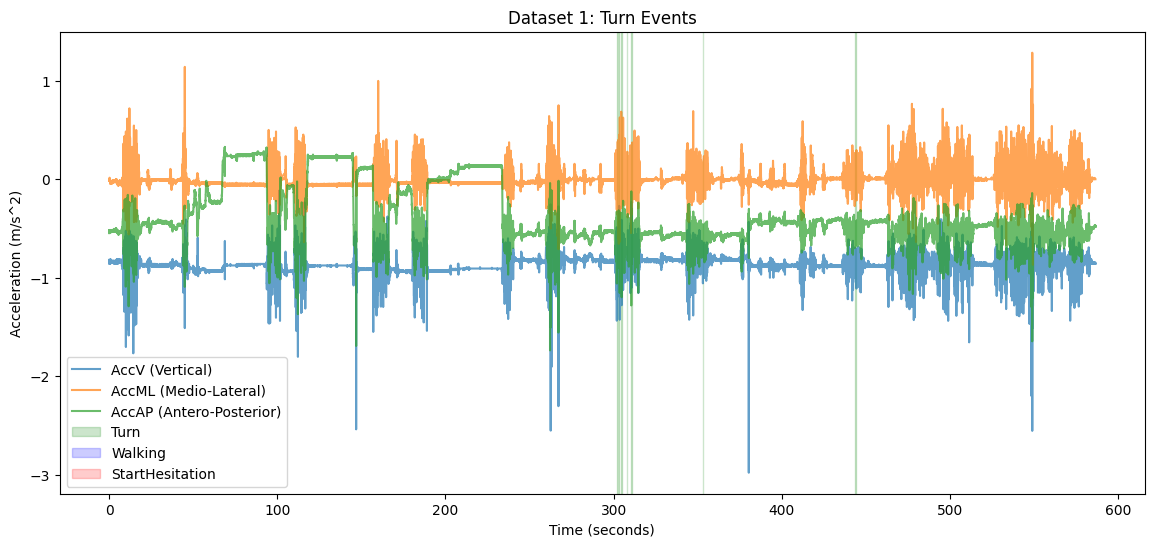

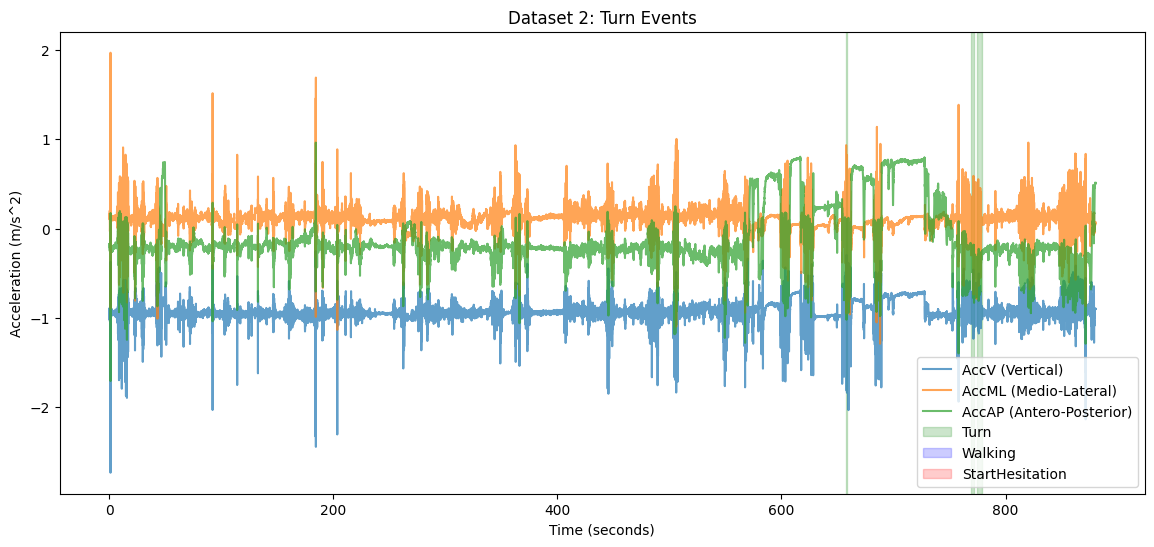

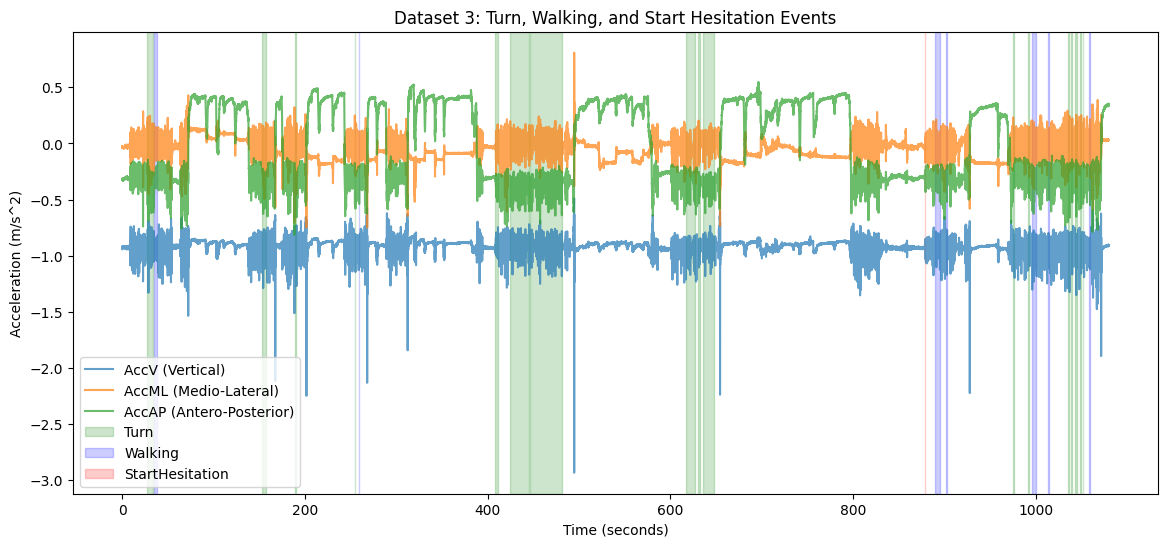

In [5]:
# 3. Plot Signals with FOG Overlay
import matplotlib.pyplot as plt

def plot_fog_events_overlay(df, title):
    """
    Plot accelerometer signals with FoG events shaded directly on the same graph.
    """
    # Convert timestamps to seconds
    df["Time_sec"] = df["Time"] / 128.0  
    
    fig, ax = plt.subplots(figsize=(14, 6))
    
    # Plot all 3 accelerometer signals
    ax.plot(df["Time_sec"], df["AccV"], label="AccV (Vertical)", alpha=0.7)
    ax.plot(df["Time_sec"], df["AccML"], label="AccML (Medio-Lateral)", alpha=0.7)
    ax.plot(df["Time_sec"], df["AccAP"], label="AccAP (Antero-Posterior)", alpha=0.7)
    
    # Define colors
    colors = {
        "Turn": "green",
        "Walking": "blue",
        "StartHesitation": "red"
    }
    
    # Shade event regions
    for event, color in colors.items():
        if event in df.columns:
            in_event = False
            start_time = None
            for t, val in zip(df["Time_sec"], df[event]):
                if val == 1 and not in_event:
                    in_event = True
                    start_time = t
                elif val == 0 and in_event:
                    in_event = False
                    ax.axvspan(start_time, t, color=color, alpha=0.2)
            if in_event:
                ax.axvspan(start_time, df["Time_sec"].iloc[-1], color=color, alpha=0.2)
    
    # Make sure each event appears once in the legend
    from matplotlib.patches import Patch
    legend_patches = [Patch(color=color, alpha=0.2, label=event) for event, color in colors.items() if event in df.columns]
    ax.legend(handles=ax.get_legend_handles_labels()[0] + legend_patches)
    
    ax.set_title(title)
    ax.set_xlabel("Time (seconds)")
    ax.set_ylabel("Acceleration (m/s^2)")
    plt.show()

# Example usage:
plot_fog_events_overlay(df_1, "Dataset 1: Turn Events")
plot_fog_events_overlay(df_2, "Dataset 2: Turn Events")
plot_fog_events_overlay(df_3, "Dataset 3: Turn, Walking, and Start Hesitation Events")


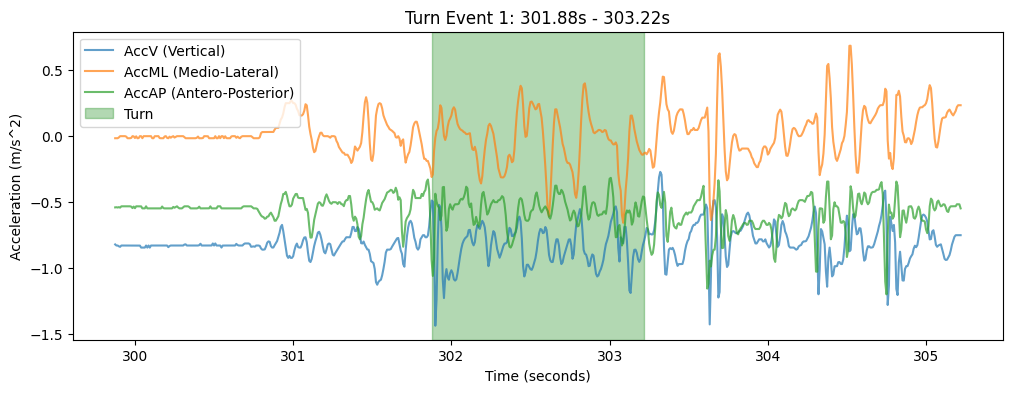

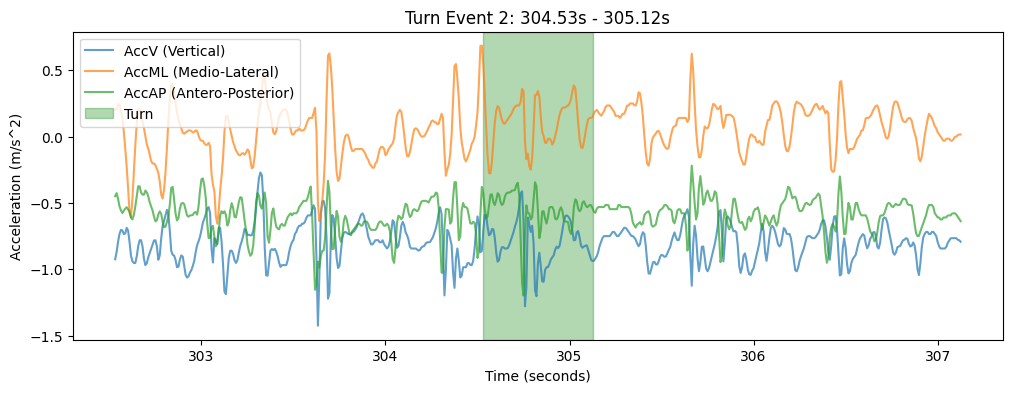

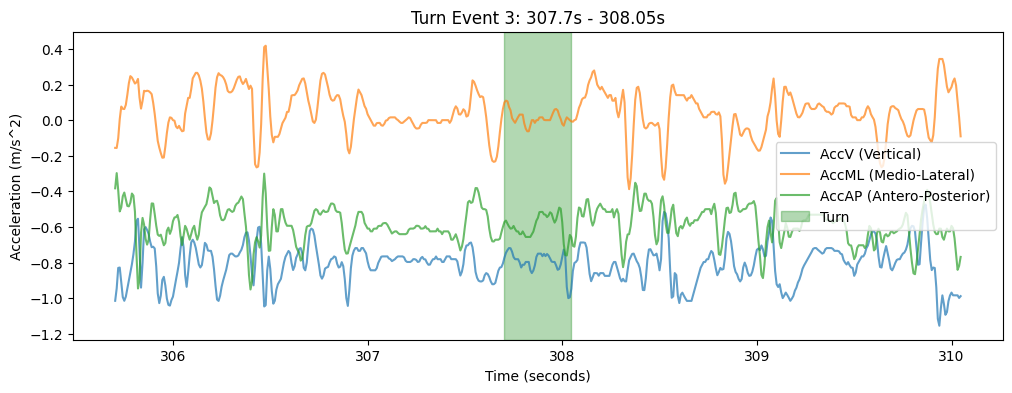

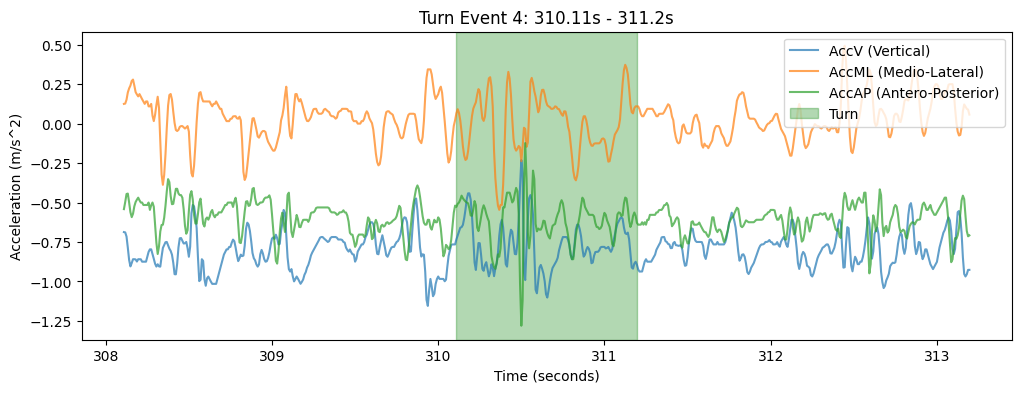

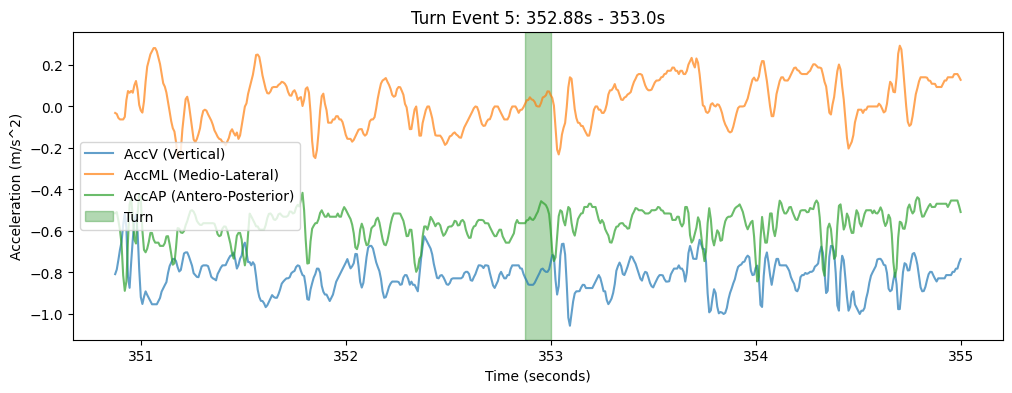

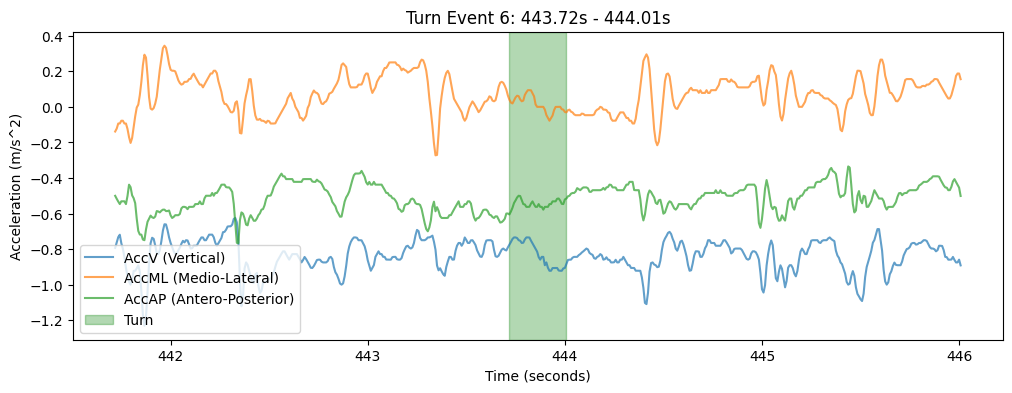

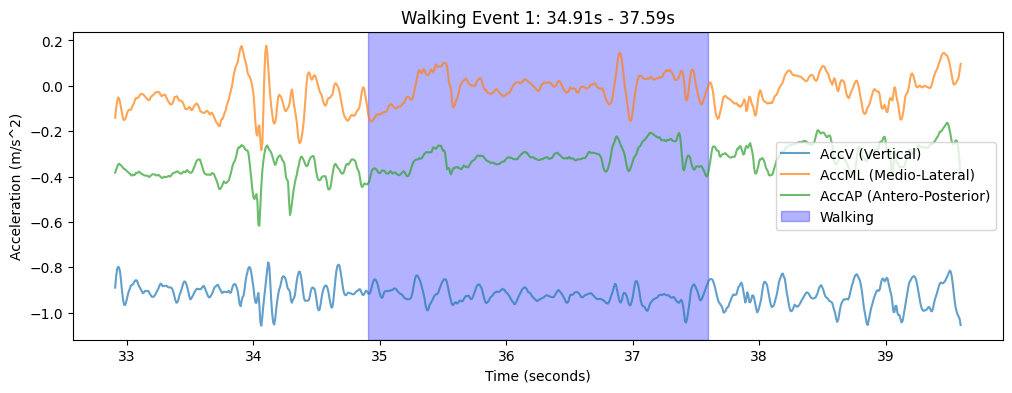

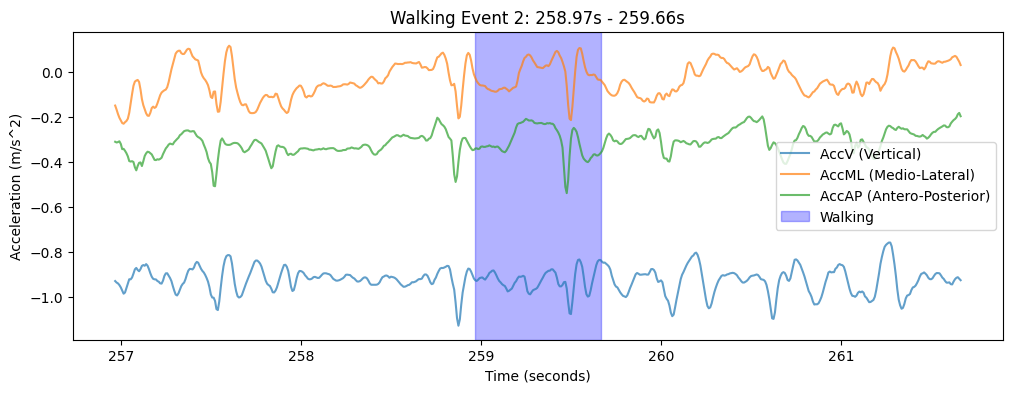

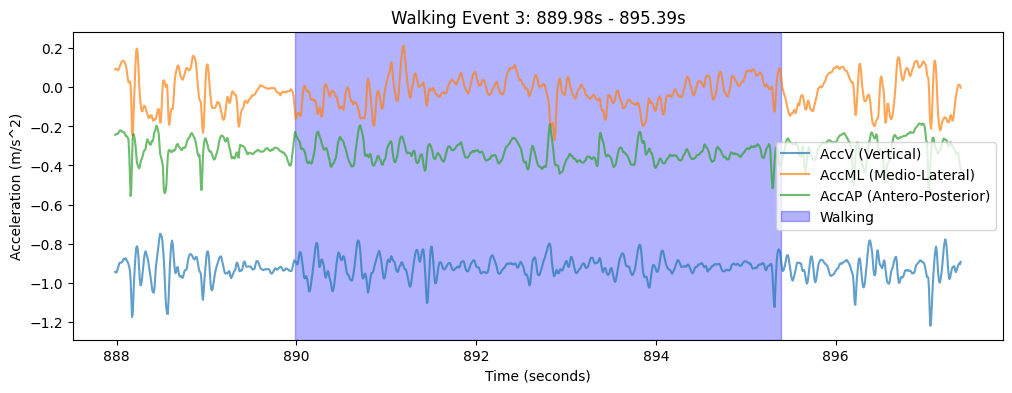

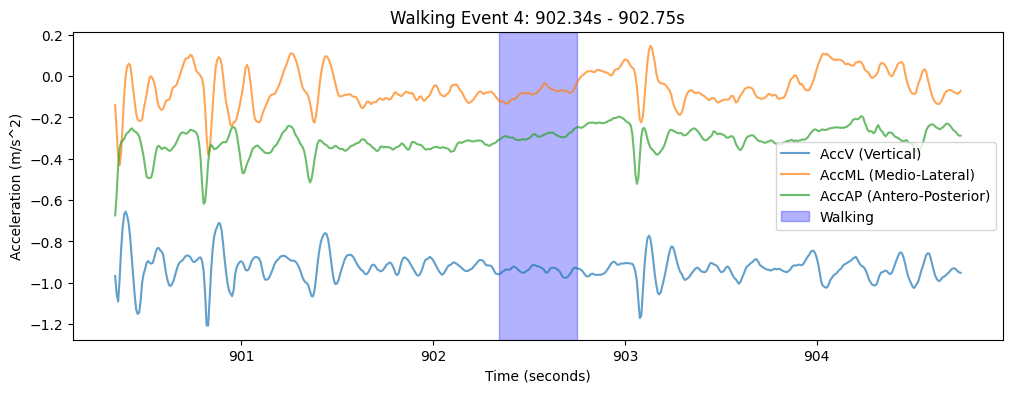

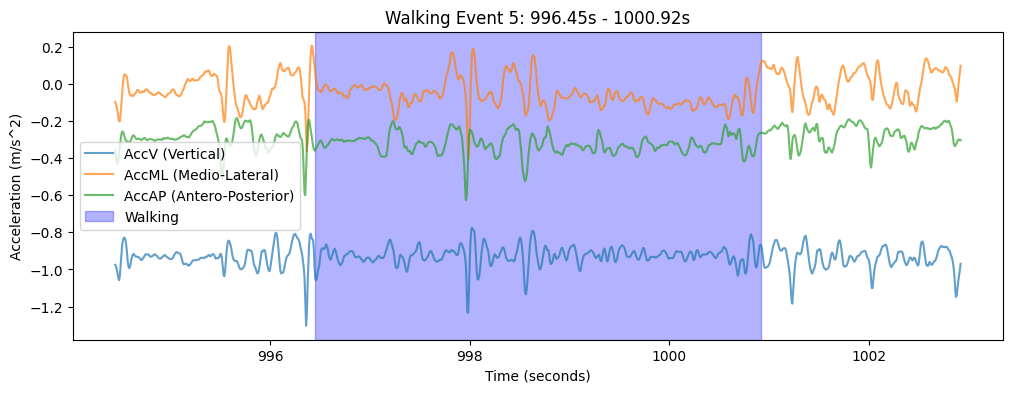

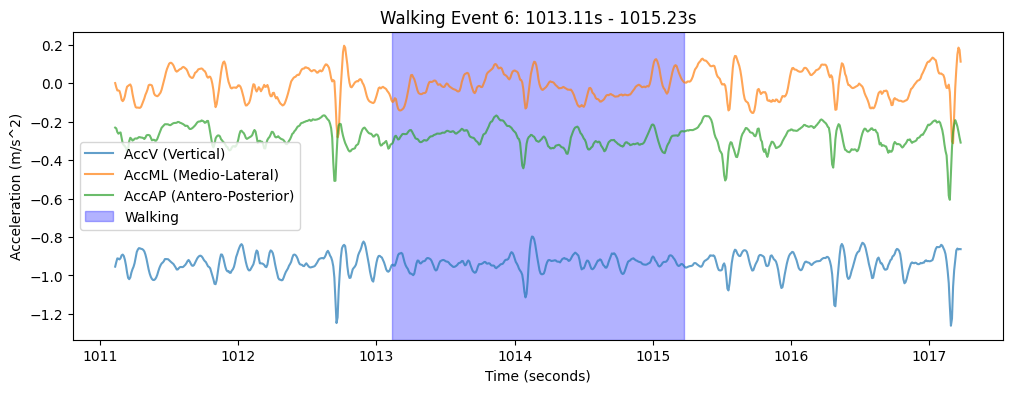

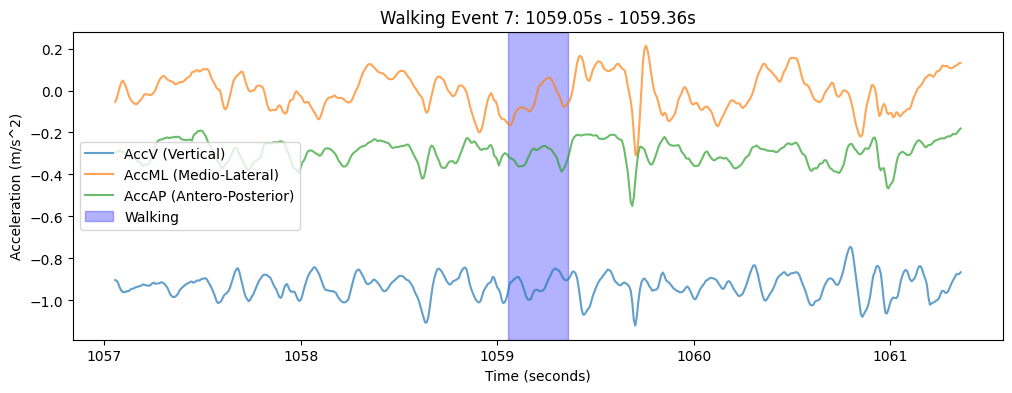

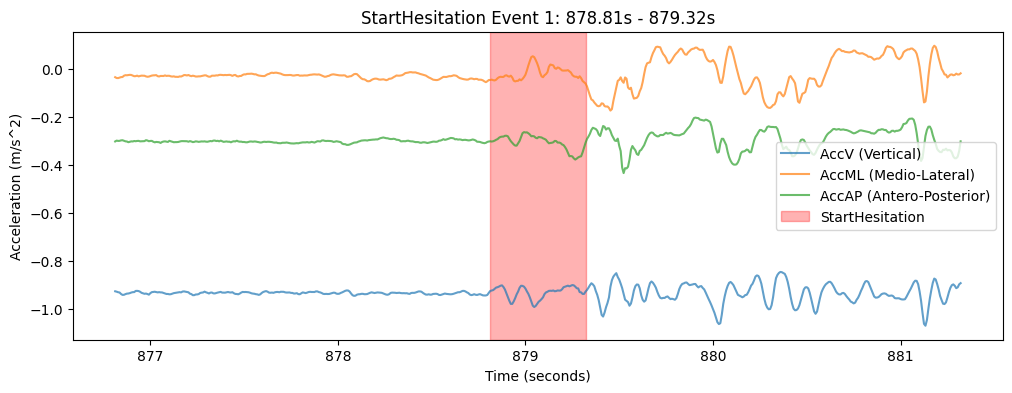

In [6]:
def plot_zoomed_fog_events(df, event="StartHesitation", margin=2, sample_rate=128):
    """
    Create zoomed-in plots around each FoG event.
    
    Parameters:
    - df: DataFrame with accelerometer signals and event columns
    - event: string, the event column to zoom in on (e.g., "StartHesitation")
    - margin: seconds before/after the event window to include
    - sample_rate: sampling rate (default 128 Hz)
    """
    df["Time_sec"] = df["Time"] / sample_rate
    
    in_event = False
    start_time = None
    event_windows = []
    
    # Find contiguous event windows
    for t, val in zip(df["Time_sec"], df[event]):
        if val == 1 and not in_event:
            in_event = True
            start_time = t
        elif val == 0 and in_event:
            in_event = False
            event_windows.append((start_time, t))
    if in_event:
        event_windows.append((start_time, df["Time_sec"].iloc[-1]))
    
    # Plot each event window
    for i, (start, end) in enumerate(event_windows, 1):
        fig, ax = plt.subplots(figsize=(12, 4))
        mask = (df["Time_sec"] >= start - margin) & (df["Time_sec"] <= end + margin)
        sub_df = df.loc[mask]
        
        ax.plot(sub_df["Time_sec"], sub_df["AccV"], label="AccV (Vertical)", alpha=0.7)
        ax.plot(sub_df["Time_sec"], sub_df["AccML"], label="AccML (Medio-Lateral)", alpha=0.7)
        ax.plot(sub_df["Time_sec"], sub_df["AccAP"], label="AccAP (Antero-Posterior)", alpha=0.7)

        if (event == "Turn"): color = "green"
        elif (event == "Walking"): color = "blue"
        else: color = "red"
        
        ax.axvspan(start, end, color=color, alpha=0.3, label=event)
        
        ax.set_title(f"{event} Event {i}: {round(start,2)}s - {round(end,2)}s")
        ax.set_xlabel("Time (seconds)")
        ax.set_ylabel("Acceleration (m/s^2)")
        ax.legend()
        plt.show()

plot_zoomed_fog_events(df_1, "Turn")
plot_zoomed_fog_events(df_3, "Walking")
plot_zoomed_fog_events(df_3)